Following piece of code consists redundant data

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv('/content/sample_dataset (1).csv')
dataset.head

<bound method NDFrame.head of          time                     name  reflectivity  velocity  power  \
0    23:50:08  NGP180213235003.RAWCG1T          30.5  1.007874   31.5   
1    22:50:15  NGP180213225007.RAWD9BK          30.5  7.820000   30.5   
2    23:40:09  NGP180213234003.RAWCFZG          31.5  1.007874   33.0   
3    23:20:11  NGP180213232003.RAWD9BS          31.0  7.820000   31.5   
4    23:30:10  NGP180213233003.RAWD9BU          30.5  7.820000   34.5   
..        ...                      ...           ...       ...    ...   
542  00:52:20  NGP180213005201.RAWD93N          31.5  3.940000   30.5   
543  00:02:25  NGP180213000201.RAWD93C          30.5  0.740000   31.0   
544  00:22:22  NGP180213002201.RAWC634          30.5  1.007874   30.5   
545  00:12:24  NGP180213001201.RAWD93E          32.0  1.230000   30.5   
546  00:32:21  NGP180213003207.RAWC65F          30.5  1.007874   30.5   

     spectrum_width  
0          7.822500  
1          7.820000  
2          7.822500  
3    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
dataset.describe()

,reflectivity,velocity,power,spectrum_width
count,547.000000,547.000000,547.000000,547.000000
mean,31.548446,2.242412,31.461609,3.350687
std,2.799616,2.451174,1.876788,3.174738
min,30.500000,0.000000,30.500000,0.060000
25%,30.500000,1.007874,30.500000,1.230000
50%,30.500000,1.007874,31.000000,1.970000
75%,31.000000,1.970000,31.500000,7.820000
max,54.000000,10.590000,40.000000,14.043543


In [24]:
dataset

,time,name,reflectivity,velocity,power,spectrum_width
0,23:50:08,NGP180213235003.RAWCG1T,30.5,1.007874,31.5,7.822500
1,22:50:15,NGP180213225007.RAWD9BK,30.5,7.820000,30.5,7.820000
2,23:40:09,NGP180213234003.RAWCFZG,31.5,1.007874,33.0,7.822500
3,23:20:11,NGP180213232003.RAWD9BS,31.0,7.820000,31.5,7.820000
4,23:30:10,NGP180213233003.RAWD9BU,30.5,7.820000,34.5,7.820000
...,...,...,...,...,...,...
542,00:52:20,NGP180213005201.RAWD93N,31.5,3.940000,30.5,3.940000
543,00:02:25,NGP180213000201.RAWD93C,30.5,0.740000,31.0,0.740000
544,00:22:22,NGP180213002201.RAWC634,30.5,1.007874,30.5,2.217402
545,00:12:24,NGP180213001201.RAWD93E,32.0,1.230000,30.5,1.230000


**FOR VELOCITY AND SPECTRUM WIDTH**

---



In [25]:
X=dataset.iloc[:,3] #velocity
y=dataset.iloc[:,5] #spectrum width

In [26]:
print(X,y)

0      1.007874
1      7.820000
2      1.007874
3      7.820000
4      7.820000
         ...   
542    3.940000
543    0.740000
544    1.007874
545    1.230000
546    1.007874
Name: velocity, Length: 547, dtype: float64 0      7.822500
1      7.820000
2      7.822500
3      7.820000
4      7.820000
         ...   
542    3.940000
543    0.740000
544    2.217402
545    1.230000
546    2.956535
Name: spectrum_width, Length: 547, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/6, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

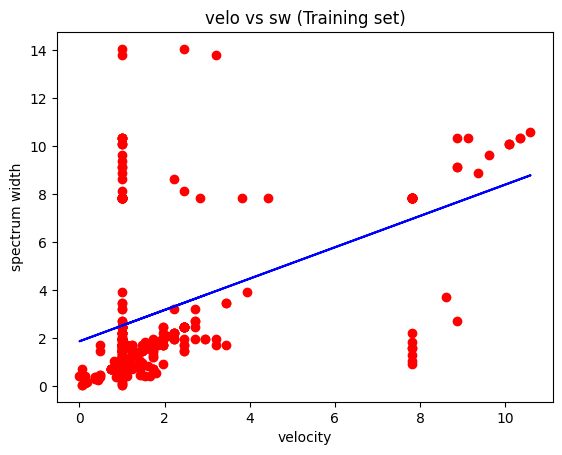

In [28]:
plt.scatter(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('velo vs sw (Training set)')
plt.xlabel('velocity')
plt.ylabel('spectrum width')
plt.show()

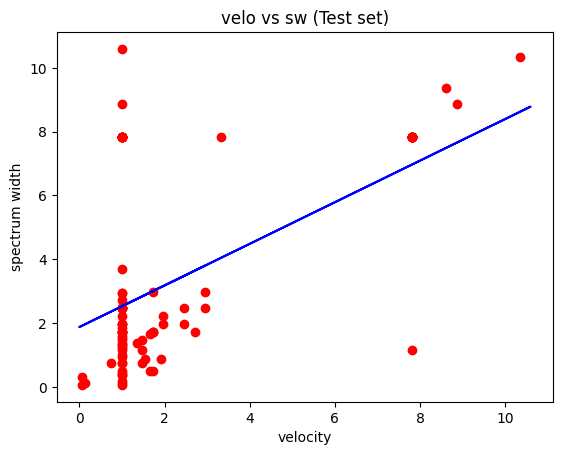

In [29]:
plt.scatter(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('velo vs sw (Test set)')
plt.xlabel('velocity')
plt.ylabel('spectrum width')
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.3702265370821254


**FOR REFLECTIVITY AND POWER**

In [31]:
X=dataset.iloc[:,2] #reflectivity
y=dataset.iloc[:,4] #power

In [32]:
print(X,y)

0      30.5
1      30.5
2      31.5
3      31.0
4      30.5
       ... 
542    31.5
543    30.5
544    30.5
545    32.0
546    30.5
Name: reflectivity, Length: 547, dtype: float64 0      31.5
1      30.5
2      33.0
3      31.5
4      34.5
       ... 
542    30.5
543    31.0
544    30.5
545    30.5
546    30.5
Name: power, Length: 547, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

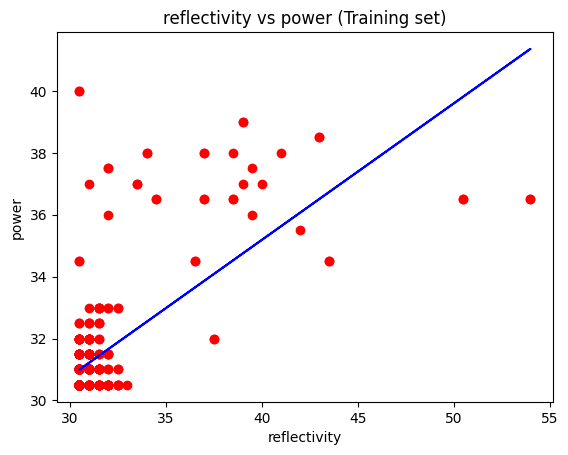

In [34]:
plt.scatter(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('reflectivity vs power (Training set)')
plt.xlabel('reflectivity')
plt.ylabel('power')
plt.show()

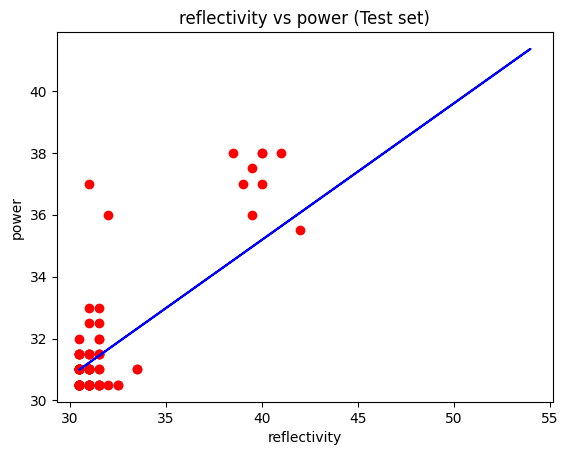

In [35]:
plt.scatter(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('reflectivity vs power (Test set)')
plt.xlabel('reflectivity')
plt.ylabel('power')
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.6624746203072961


Following peice of code does not have redundant data

In [37]:
dataset = pd.read_csv('/content/sample_dataset (1).csv')
dataset.head

<bound method NDFrame.head of          time                     name  reflectivity  velocity  power  \
0    23:50:08  NGP180213235003.RAWCG1T          30.5  1.007874   31.5   
1    22:50:15  NGP180213225007.RAWD9BK          30.5  7.820000   30.5   
2    23:40:09  NGP180213234003.RAWCFZG          31.5  1.007874   33.0   
3    23:20:11  NGP180213232003.RAWD9BS          31.0  7.820000   31.5   
4    23:30:10  NGP180213233003.RAWD9BU          30.5  7.820000   34.5   
..        ...                      ...           ...       ...    ...   
542  00:52:20  NGP180213005201.RAWD93N          31.5  3.940000   30.5   
543  00:02:25  NGP180213000201.RAWD93C          30.5  0.740000   31.0   
544  00:22:22  NGP180213002201.RAWC634          30.5  1.007874   30.5   
545  00:12:24  NGP180213001201.RAWD93E          32.0  1.230000   30.5   
546  00:32:21  NGP180213003207.RAWC65F          30.5  1.007874   30.5   

     spectrum_width  
0          7.822500  
1          7.820000  
2          7.822500  
3    

In [38]:
dataset = dataset.drop_duplicates(subset=['time'])
dataset.describe()

,reflectivity,velocity,power,spectrum_width
count,274.000000,274.000000,274.000000,274.000000
mean,31.551095,1.951948,31.459854,3.349211
std,2.800304,2.252268,1.877238,3.175027
min,30.500000,0.000000,30.500000,0.061594
25%,30.500000,1.007874,30.500000,1.230000
50%,30.500000,1.007874,31.000000,1.970000
75%,31.000000,1.480000,31.500000,7.820000
max,54.000000,10.100000,40.000000,14.043543


**FOR VELOCITY AND SPECTRUM WIDTH**

---



In [39]:
X=dataset.iloc[:,3] #velocity
y=dataset.iloc[:,5] #spectrum width
print(X,y)

0      1.007874
1      7.820000
2      1.007874
3      7.820000
4      7.820000
         ...   
533    1.007874
536    1.007874
537    1.007874
538    2.960000
540    1.007874
Name: velocity, Length: 274, dtype: float64 0      7.822500
1      7.820000
2      7.822500
3      7.820000
4      7.820000
         ...   
533    0.369567
536    1.231890
537    3.942047
538    2.960000
540    0.739134
Name: spectrum_width, Length: 274, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/6, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

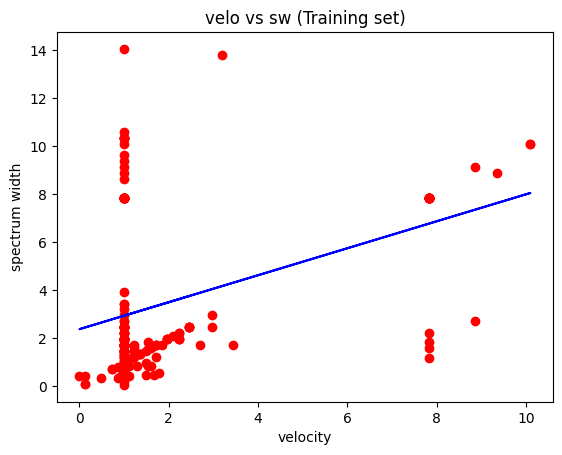

In [41]:
plt.scatter(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('velo vs sw (Training set)')
plt.xlabel('velocity')
plt.ylabel('spectrum width')
plt.show()

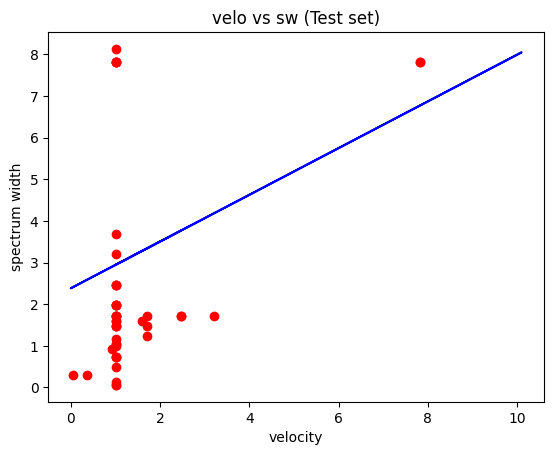

In [42]:
plt.scatter(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('velo vs sw (Test set)')
plt.xlabel('velocity')
plt.ylabel('spectrum width')
plt.show()

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.08380940565631145


**FOR REFLECTIVITY AND POWER**

In [44]:
X=dataset.iloc[:,2] #reflectivity
y=dataset.iloc[:,4] #power
print(X,y)

0      30.5
1      30.5
2      31.5
3      31.0
4      30.5
       ... 
533    41.0
536    32.0
537    31.5
538    30.5
540    30.5
Name: reflectivity, Length: 274, dtype: float64 0      31.5
1      30.5
2      33.0
3      31.5
4      34.5
       ... 
533    38.0
536    30.5
537    30.5
538    30.5
540    31.0
Name: power, Length: 274, dtype: float64


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

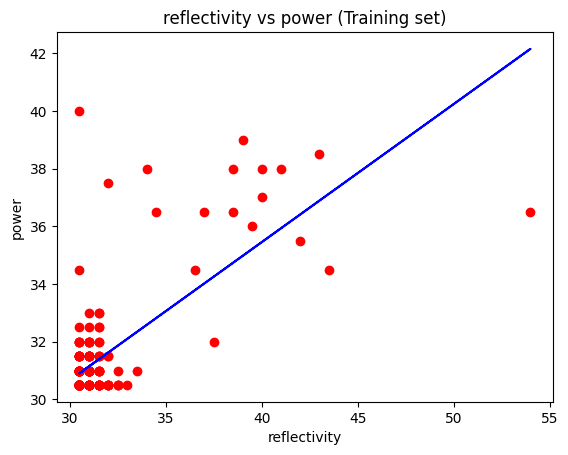

In [46]:
plt.scatter(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1), color = 'red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color = 'blue')
plt.title('reflectivity vs power (Training set)')
plt.xlabel('reflectivity')
plt.ylabel('power')
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.47166890853771004
